# 주식 종목 데이터 크롤링

In [1]:
import pandas as pd
import pandas_datareader as pdr
import matplotlib.font_manager as fm
from matplotlib import font_manager,rc
import matplotlib as mpl
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', size = 12)
rc('font', family=font_name)
mpl.rcParams['axes.unicode_minus'] = False

import matplotlib as mpl
%matplotlib inline

# 종목 타입에 따라 download url이 다름. 종목코드 뒤에 .KS .KQ등이 입력되어야해서 Download Link 구분 필요
stock_type = {
    'kospi': 'stockMkt',
    'kosdaq': 'kosdaqMkt'
}

# 회사명으로 주식 종목 코드를 획득할 수 있도록 하는 함수
def get_code(df, name):
  code = df.query("name=='{}'".format(name))['code'].to_string(index=False)
  
  # 위와같이 code명을 가져오면 앞에 공백이 붙어있는 상황이 발생하여 앞뒤로 sript() 하여 공백 제거
  code = code.strip()
  return code

# download url 조합
def get_download_stock(market_type=None):
  market_type_param = stock_type[market_type]
  download_link = 'http://kind.krx.co.kr/corpgeneral/corpList.do'
  download_link = download_link + '?method=download'
  download_link = download_link + '&marketType=' + market_type_param

  df = pd.read_html(download_link, header=0)[0]
  return df;

# kospi 종목코드 목록 다운로드
def get_download_kospi():
  df = get_download_stock('kospi')
  df.종목코드 = df.종목코드.map('{:06d}.KS'.format)
  return df

# kosdaq 종목코드 목록 다운로드
def get_download_kosdaq():
  df = get_download_stock('kosdaq')
  df.종목코드 = df.종목코드.map('{:06d}.KQ'.format)
  return df

c:\program files\python37\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [150]:
# kospi, kosdaq 종목코드 각각 다운로드
kospi_df = get_download_kospi()
kosdaq_df = get_download_kosdaq()

# data frame merge
code_df = pd.concat([kospi_df, kosdaq_df])

# data frame정리
code_df = code_df[['회사명', '종목코드']]

# data frame title 변경 '회사명' = name, 종목코드 = 'code'
code_df = code_df.rename(columns={'회사명': 'name', '종목코드': 'code'})

code_df


,name,code
0,JS전선,005560.KS
1,거북선2호,101380.KS
2,거북선6호,114140.KS
3,교보메리츠,064900.KS
4,국제관광공사,028780.KS
...,...,...
2222,한라IMS,092460.KQ
2223,한류AI센터,222810.KQ
2224,핸디소프트,220180.KQ
2225,홈센타홀딩스,060560.KQ







# 주식 종가 그래프 (15.03 ~ 20.03) 


,삼성전자,네이버
Date,,
2015-03-25,29700.0,134000.0
2015-03-26,28420.0,132200.0
2015-03-27,28420.0,134400.0
2015-03-30,28560.0,136200.0
2015-03-31,28820.0,134200.0
...,...,...
2020-03-06,56500.0,179500.0
2020-03-09,56500.0,179500.0
2020-03-10,54600.0,172000.0


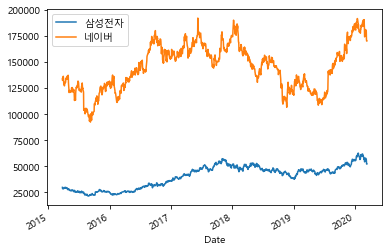

In [526]:
# import fix_yahoo_finance as yf
# yf.pdr_override()

code = get_code(code_df, '삼성전자')
df_samsung = pdr.get_data_yahoo(code, start='2015-03-25', end='2020-03-12')
# df_samsung = pdr.get_data_yahoo(code)

# df_samsung['Close'].plot(label='adf')

code = get_code(code_df, 'NAVER')
df_naver = pdr.get_data_yahoo(code, start='2015-03-25', end='2020-03-12')

code = get_code(code_df, '현대차')
df_hyun = pdr.get_data_yahoo('005380.KS', start='2015-03-25', end='2020-03-12')

code = get_code(code_df, '기아차')
df_kia = pdr.get_data_yahoo('000270.KS', start='2015-03-25', end='2020-03-12')

close_df = pd.DataFrame({'삼성전자':df_samsung['Close'], '네이버':df_naver['Close']})
# close_df = pd.DataFrame({'삼성전자':df_samsung['Close'], '네이버':df_naver['Close'], '현대차':df_hyun['Close']})
# close_df = pd.DataFrame({'삼성전자':df_samsung['Close'], '네이버':df_naver['Close'], '네이버':df_hyun['Close'], '네이버':df_kia['Close']})
# close_df.to_csv(stock_data.csv)
display(close_df.sort_index())
# close_df.sort_index(ascending=False)
close_df.plot()



# 각 개별 주식의 로그 수익률 그래프와 변동성 측정 (표준편차, GARCH)


-----------------------------------------------------------
	----------------------------------
	삼성전자   Volatility :  5.187 %
	네이버     Volatility :  6.256 %
	----------------------------------
-----------------------------------------------------------
-----------------------------------------------------------
	----------------------------------
	삼성전자   Volatility :  4.786 %
	네이버     Volatility :  5.705 %
	----------------------------------
-----------------------------------------------------------
----------------------------------------------------------------------------
		---------------------------------------
		ARCH 모델과 GARCH 모델을 통한 Volatility
		---------------------------------------

Iteration:      1,   Func. Count:      5,   Neg. LLF: 2411.372354526574
Iteration:      2,   Func. Count:     14,   Neg. LLF: 2348.9393027406027
Iteration:      3,   Func. Count:     22,   Neg. LLF: 2335.559354825969
Iteration:      4,   Func. Count:     27,   Neg. LLF: 2324.807347875299
Iteratio

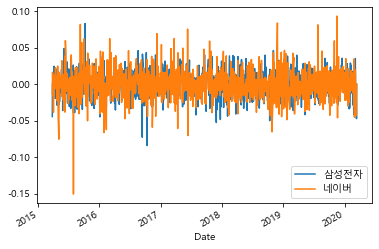

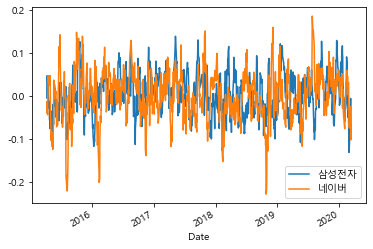

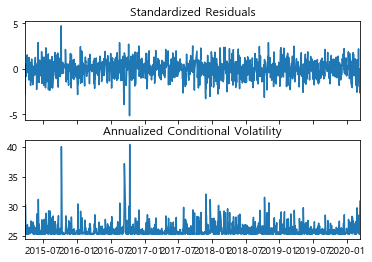

In [528]:
def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]


import numpy as np
import matplotlib.pyplot as plt
import math

from arch import arch_model

# 1일 단위의 로그 수익률
logret_df = np.log(close_df / close_df.shift(1)) 
logret_df = logret_df.dropna()



# 10일 단위의 로그 수익률 
day10_logret_df = np.log(close_df / close_df.shift(10)) 
day10_logret_df = day10_logret_df.dropna()



# logret_df.columns = ['삼성전자', '네이버', '현대차']
# display(logret_df.sort_index(ascending=False).head(10))
logret_df.plot()

# display(day10_logret_df.sort_index(ascending=False).head(10))
day10_logret_df.plot()

# 단순 표준편차 변동성
# daily 가 아니라 10일 간격의 수익률을 구하기 위해서 shift(10) 외에서 root10 을 곱해서 할 수도 있다.
daily_volatility = (logret_df.std() * math.sqrt(10))
print("-----------------------------------------------------------")
print("\t----------------------------------")
print("\t삼성전자   Volatility :  %0.3f" % (daily_volatility["삼성전자"] * 100) + " %")
print("\t네이버     Volatility :  %0.3f" % (daily_volatility["네이버"] * 100) + " %")
# print("현대차     Volatility :  %0.3f" % (daily_volatility["현대차"] * 100) + " %")
print("\t----------------------------------")
print("-----------------------------------------------------------")

day10_volatility = day10_logret_df.std()

print("-----------------------------------------------------------")
print("\t----------------------------------")
print("\t삼성전자   Volatility :  %0.3f" % (day10_volatility["삼성전자"] * 100) + " %")
print("\t네이버     Volatility :  %0.3f" % (day10_volatility["네이버"] * 100) + " %")
# print("현대차     Volatility :  %0.3f" % (daily_volatility["현대차"] * 100) + " %")
print("\t----------------------------------")
print("-----------------------------------------------------------")


print("----------------------------------------------------------------------------")
print("\t\t---------------------------------------")
print("\t\tARCH 모델과 GARCH 모델을 통한 Volatility")

print("\t\t---------------------------------------\n")
# print("-----------------------------------------------------------")

# ARCH, GARCH 모델
# ret_ibov = returns['IBOV_1st']
# garch_volatility = arch_model(logret_df, vol='Garch', p=1, o=0, q=1, dist='Normal', rescale=True)
# result_garch = garch_volatility.fit()

am1 = arch_model(logret_df["삼성전자"], p=1, q=0, rescale=True)
res1 = am1.fit()
# print(res1.summary())
res1.plot(annualize='D')
plt.show()
# https://datascienceschool.net/view-notebook/dac8a9bfac6740ff85d5b6dcc9e9e908/

# 개별 자산의 로그 수익률 분포와 정규 분포의 비교

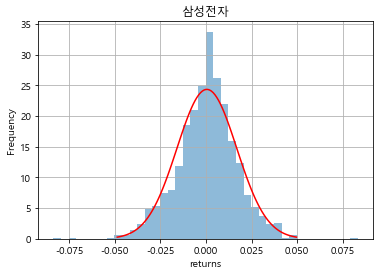

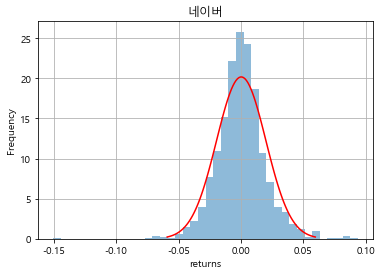

In [530]:
import matplotlib.mlab as mlab
from scipy.stats import norm

mean = np.mean(logret_df['삼성전자'])
std_dev = np.std(logret_df['삼성전자'])

logret_df['삼성전자'].hist(bins=40, density=True, histtype='stepfilled', alpha=0.5)
x = np.linspace(mean - 3*std_dev, mean + 3*std_dev, 100)
plt.plot(x, norm.pdf(x, mean, std_dev), "r")
plt.xlabel("returns")
plt.ylabel("Frequency")
plt.title('삼성전자') 
plt.show()

mean = np.mean(logret_df['네이버'])
std_dev = np.std(logret_df['네이버'])

logret_df['네이버'].hist(bins=40, density=True, histtype='stepfilled', alpha=0.5)
x = np.linspace(mean - 3*std_dev, mean + 3*std_dev, 100)

plt.plot(x, norm.pdf(x, mean, std_dev), "r")
plt.xlabel("returns")
plt.ylabel("Frequency")
plt.title('네이버') 
plt.show()


# 개별 자산의 상관관계 측정

In [523]:
from tabulate import tabulate
from scipy.stats import norm


def calc_pfo_return(mu, w): 
    return w.dot(mu)


# 포트폴리오의 변동성은 공분산을 이용하여 계산
def calc_pfo_vol(Sigma, w): 
    return np.dot(np.dot(w, Sigma), w.T) ** 0.5


# 정규분포를 가정한 분산 공분산 VaR 계산
def var_cov_var(P, c, mu, sigma):
    """
    confidence level c, with mean of returns mu
    and standard deviation of returns sigma, 
    on a portfolio of value P.
    """
    alpha = norm.ppf(1-c, mu, sigma)
    print(-alpha)
    return P- P*(alpha + 1)


def plot_cum_return(ax, pct_return, day10_pct_return, w): 
    samsung_return = (pct_return * [1, 0]).sum(axis=1) # 100% 
    naver_return = (pct_return * [0, 1]).sum(axis=1) # 100% 
    portfolio_return = (pct_return * w).sum(axis=1) # 포트폴리오 비중대로
    day10_pct_return = (day10_pct_return * w).sum(axis=1) # 포트폴리오 비중대로 10일 기준

    
    VaR_90 = portfolio_return.quantile(0.1)
    VaR_95 = portfolio_return.quantile(0.05)
    VaR_99 = portfolio_return.quantile(0.01)
    print("------------------------------------")
    print("       1 DAY  historical VaR        ")
    print("------------------------------------")
    print(tabulate([["90%", VaR_90],["95%", VaR_95], ["99%", VaR_99]], headers = ["confidence Level", "Value at Risk"]))
    print("------------------------------------\n")
    
    
    VaR_90 = day10_pct_return.quantile(0.1)
    VaR_95 = day10_pct_return.quantile(0.05)
    VaR_99 = day10_pct_return.quantile(0.01)
    
    print("------------------------------------")
    print("       10 DAY  historical VaR        ")
    print("------------------------------------")
    print(tabulate([["90%", VaR_90],["95%", VaR_95], ["99%", VaR_99]], headers = ["confidence Level", "Value at Risk"]))
    print("------------------------------------\n")
    
    P = 1e7   # 10,000,000 원
#     c = 0.99  # 99% confidence interval
    mu = np.mean(portfolio_return)
    sigma = np.std(portfolio_return)
    covar99_method_var = var_cov_var(P, 0.99, mu, sigma)
    covar95_method_var = var_cov_var(P, 0.95, mu, sigma)
    covar90_method_var = var_cov_var(P, 0.9, mu, sigma)
    
    print("------------------------------------")
    print("\nVariance-Covariance Method 1천만원 투자시 1day 90%% VaR of : %0.2f 원" % covar90_method_var + "\n")
    print("\nVariance-Covariance Method 1천만원 투자시 1day 95%% VaR of : %0.2f 원" % covar95_method_var + "\n")
    print("\nVariance-Covariance Method 1천만원 투자시 1day 99%% VaR of : %0.2f 원" % covar99_method_var + "\n")
    print("------------------------------------\n")
    
    
    
    # label
    ax.plot(samsung_return, label='삼성전자')
    ax.plot(naver_return, label='네이버')
    ax.plot(portfolio_return, label='Portfolio')

    # 타이틀과 축 이름을 설정
    ax.set_title('Cummulative Percent Return') 
    ax.set_xlabel('Date') 
    ax.set_ylabel('Return (%)') 
    ax.legend()

    
def plot_mean_variance(ax, logret, w): 
    # 자산의 년 환산 기대수익률과 공분산 행렬을 계산
    mu = logret.mean().values * 251 
    Sigma = logret.cov().values * 251

    # 자산별 risk와 return을 계산하여 그래프에 출력
    ax.plot(Sigma[0][0] ** 0.5, mu[0], marker='s', color='#1F77B4', markeredgewidth=1, markersize=10, label='삼성전자'); 
    ax.plot(Sigma[1][1] ** 0.5, mu[1], marker='s', color='#FF7F0E', markeredgewidth=1, markersize=10, label='NAVER'); 

    # 위에서 만든 함수를 호출하여 포트폴리오의 risk와 return 을 계산
    pfo_vol = calc_pfo_vol(Sigma, w) 
    pfo_return = calc_pfo_return(mu, w)
#     print("------------------------------------")
#     print("\nVolatility : " + str(pfo_vol) + "\n")
#     print("------------------------------------")
#     print("------------------------------------")
#     print("\nReturn : " + str(pfo_return) + "\n")
#     print("------------------------------------")
       
    
    # 계산된 포트폴리오의 risk와 return을 그래프에 표시 
    ax.plot(pfo_vol, pfo_return, marker='x', color='#2CA02C', markeredgewidth=2, markersize=10, label='Portfolio') 

    # 원점이 나오도록 표시해주고 타이틀과 축 이름을 설정
    ax.plot(0,0) 
    ax.set_title('Risk-Return Plane') 
    ax.set_xlabel('Volatility') 
    ax.set_ylabel('Log Return') 
    ax.legend()
    


In [524]:

def get_port_return(start_date, end_date, samsung_weight, naver_weight):
    # 비중
    samsung_weight /= 100
    naver_weight /= 100
    w = np.array([samsung_weight, naver_weight])

    # 해당 기간의 로그 수익률
    logret = logret_df[start_date:end_date]
    day10_logret = day10_logret_df[start_date:end_date]

    # 로그 수익률을 퍼센트로 변환
    pct_return = np.exp(logret.cumsum()) - 1
    day10_pct_return = np.exp(day10_logret.cumsum()) - 1

    # figure 생성
    fig = plt.figure(figsize=(12, 3))

    # subplot2grid를 사용하여 그래프 레이아웃
    # ax1 그래프가 가로 비율 3만큼 차지하도록
    ax1 = plt.subplot2grid((1, 4), (0, 0), colspan=3, rowspan=1)
    plot_cum_return(ax1, pct_return, day10_pct_return, w) # ax1에 누적 수익률 그래프를 출력

    # ax2 그래프가 가로 비율 1만큼 차지하도록
    ax2 = plt.subplot2grid((1, 4), (0, 3))
    plot_mean_variance(ax2, logret, w) # ax2에 risk-return 그래프를 출력

    plt.tight_layout()
    

# widget 컨트롤

In [525]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
# !jupyter nbextension enable --py widgetsnbextension

# interactive 를 위한 세팅
x = widgets.IntSlider(min=0, max=100, step=5, value=50) 
y = widgets.IntSlider(min=0, max=100, step=5, value=50) 

def update_y_range(*args): 
    y.value = 100 - x.value 

def update_x_range(*args): 
    x.value = 100 - y.value 

y.observe(update_x_range, 'value')
x.observe(update_y_range, 'value')



interact(get_port_return,samsung_weight=x, naver_weight=y, 
        start_date=widgets.DatePicker(value=pd.to_datetime('2015-03-25')), 
         end_date=widgets.DatePicker(value=pd.to_datetime('2020-03-12')))


interactive(children=(DatePicker(value=Timestamp('2015-03-25 00:00:00'), description='start_date'), DatePicker…

<function __main__.get_port_return(start_date, end_date, samsung_weight, naver_weight)>

# 효율적 프론티어 (포트폴리오 최적화)

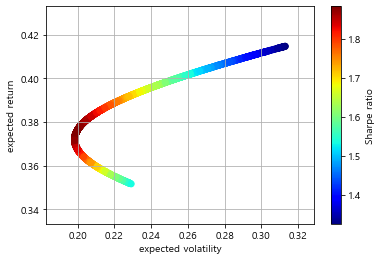

In [468]:
# display(logret_df)

# weights = np.random.random(logret_df.shape[1])
# weights /= np.sum(weights)
# print(weights)
# prets = np.sum(logret_df.mean() * weights) * 252
# print(prets)

np.random.seed(2)
prets = []
pvols = []
for p in range (2500):
    weights = np.random.random(logret_df.shape[1])
    weights /= np.sum(weights)
    prets.append(np.sum(logret_df.mean() * weights) * 252)
    pvols.append(np.sqrt(np.dot(weights.T, np.dot(logret_df.cov() * 252, weights))))
prets = np.array(prets)
pvols = np.array(pvols)

plt.scatter(pvols, prets, c=prets/pvols, marker='o', cmap=mpl.cm.jet)
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')
plt.show()


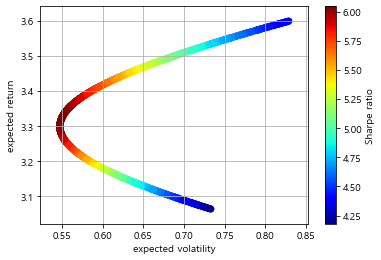

In [469]:
prets = []
pvols = []
for p in range (2500):
    weights = np.random.random(day10_logret_df.shape[1])
    weights /= np.sum(weights)
    prets.append(np.sum(day10_logret_df.mean() * weights) * 252)
    pvols.append(np.sqrt(np.dot(weights.T, np.dot(day10_logret_df.cov() * 252, weights))))
prets = np.array(prets)
pvols = np.array(pvols)

plt.scatter(pvols, prets, c=prets/pvols, marker='o', cmap=mpl.cm.jet)
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')
plt.show()


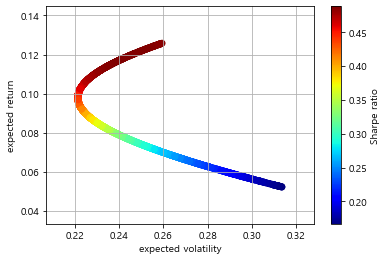

In [426]:
# 효율적 투자선
# 목표 위험 수준에 대해 최대 수익률을 가지는 모든 포트폴리오의 집합
import scipy.optimize as sco

def statistics(weights):
    ''' Return portfolio statistics.
    
    Parameters
    ==========
    weights : array-like
        포트폴리오 내의 증권 비중
    
    Returns
    =======
    pret : float
        포트폴리오 수익률의 기댓값
    pvol : float
        포트폴리오 변동성의 기댓값
    pret / pvol : float
        무위험 이자율이 0일 때의 포트폴리오 샤프 지수
    '''
    weights = np.array(weights)
    pret = np.sum(logret_df.mean() * weights) * 252
    pvol = np.sqrt(np.dot(weights.T, np.dot(logret_df.cov() * 252, weights)))
    return np.array([pret, pvol, pret / pvol])

def min_func_sharpe(weights):
    return -statistics(weights)[2]

def min_func_variance(weights):
    return statistics(weights)[1] ** 2

opts = sco.minimize(min_func_sharpe, logret_df.shape[1] * [1. / logret_df.shape[1],], method='SLSQP',
                       bounds=bnds, constraints=cons)

optv = sco.minimize(min_func_variance, logret_df.shape[1] * [1. / logret_df.shape[1],], method='SLSQP',
                       bounds=bnds, constraints=cons)




cons = ({'type': 'eq', 'fun': lambda x:  statistics(x)[0] - tret},
        {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
bnds = tuple((0, 1) for x in weights)

def min_func_port(weights):
    return statistics(weights)[1]


# %%time
trets = np.linspace(0.0, 0.25, 50)
tvols = []
for tret in trets:
    cons = ({'type': 'eq', 'fun': lambda x:  statistics(x)[0] - tret},
            {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
    res = sco.minimize(min_func_port, logret_df.shape[1] * [1. / logret_df.shape[1],], method='SLSQP',
                       bounds=bnds, constraints=cons)
    tvols.append(res['fun'])
tvols = np.array(tvols)



plt.scatter(pvols, prets,
            c=prets / pvols, marker='o', cmap=mpl.cm.jet)
            # 무작위 포트폴리오
# plt.scatter(tvols, trets,
#             c=trets / tvols, marker='x', s=70, linewidth=2, cmap=mpl.cm.jet)
#             # 효율적 투자선
# plt.plot(statistics(opts['x'])[1], statistics(opts['x'])[0],
#          'r*', markersize=30)
#             # 최대 샤프 지수를 가진 포트폴리오
# plt.plot(statistics(optv['x'])[1], statistics(optv['x'])[0],
#          'y*', markersize=30)
#             # 최소 분산 포트폴리오
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')
plt.show()


In [ ]:

import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

# Repeat for each equity in portfolio
logret_df['AAPL'].hist(bins=40, normed=True,histtype="stepfilled",alpha=0.5)
x = np.linspace(port_mean - 3*port_stdev, port_mean+3*port_stdev,100)
plt.plot(x, scipy.stats.norm.pdf(x, port_mean, port_stdev), "r")
plt.title("AAPL returns (binned) vs. normal distribution")
plt.show()


In [45]:
# ARCH / GARCH 모형 예제
https://datascienceschool.net/view-notebook/dac8a9bfac6740ff85d5b6dcc9e9e908/

In [ ]:
def CalculateVaR():
    if info == 1: print('[INFO] Calculating Daily % Changes')
    HistData['Perc_Change'] = HistData['PortValue'].pct_change() #calculating percentage change
    
    
HistData['DollarChange'] = HistData.loc[HistData.index.max()]['PortValue'] * HistData['Perc_Change'] #calculate money change based on current valuation
if info == 1: 
    print('[INFO] Picking', round(HistData.loc[HistData.index.max()]['PortValue'],2),' value from ', HistData.index.max().strftime('%Y-%m-%d'), ' as the latest valuation to base the monetary returns')